<a href="https://colab.research.google.com/github/marcelcerri/Unespebb/blob/master/Gera%C3%A7%C3%A3o_de_Dados_de_kla_em_fun%C3%A7%C3%A3o_da_rota%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dados exportados com sucesso para o arquivo: dados_dot_tempo.csv


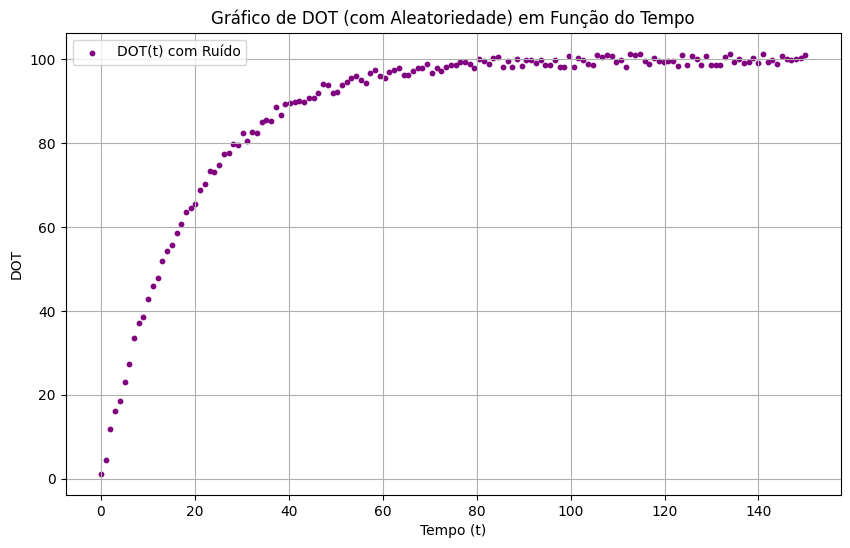

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd # Importa a biblioteca pandas

# --- Parâmetros Iniciais ---
DOT0 = 0.0   # Valor inicial de DOT
kla = 0.055   # Constante kla
amplitude_flutuacao = 1.5 # Define a amplitude da flutuação aleatória

#Estimativa de kla usando rpm
rpm = [100,200,300,400,500,600,700,800]
kla = 0.0618*(rpm**(1.21))

# --- Geração de Dados ---
# Array de tempo de 0 a 150, com 150 pontos
t = np.linspace(0.0, 150.0, 150)

# Cálculo de DOT (sem ruído)
# Equação: DOT = 100 - 100 * exp(-kla * t)
DOT_original = 100 - 100 * np.exp(-kla * t)

# Adição de ruído aleatório para simular dados reais
ruido = np.random.uniform(-amplitude_flutuacao, amplitude_flutuacao, size=DOT_original.shape)
DOT_com_ruido = DOT_original + ruido

# --- Exportação para CSV ---
output_filename_csv = "dados_dot_tempo.csv"
try:
    # Cria um DataFrame do pandas com os dados
    df = pd.DataFrame({'Tempo': t, 'DOT': DOT_com_ruido})

    # Cria uma cópia para formatação, para não alterar o df original para o plot
    df_export = df.copy()

    # Formata as colunas para o número desejado de casas decimais
    df_export['Tempo'] = df_export['Tempo'].apply(lambda x: f"{x:.1f}")
    df_export['DOT'] = df_export['DOT'].apply(lambda x: f"{x:.2f}")

    # Exporta o DataFrame formatado para um arquivo CSV
    # index=False evita que o índice do DataFrame seja escrito no arquivo
    df_export.to_csv(output_filename_csv, index=False, sep=',')
    print(f"Dados exportados com sucesso para o arquivo: {output_filename_csv}")
except ImportError:
    print("A biblioteca pandas não está instalada. Por favor, instale-a para exportar para CSV.")
    print("Você pode instalar usando: pip install pandas")
except IOError:
    print(f"Erro ao tentar escrever no arquivo: {output_filename_csv}")
except Exception as e:
    print(f"Ocorreu um erro inesperado durante a exportação para CSV: {e}")

# --- Criação do Gráfico ---
plt.figure(figsize=(10, 6))

# Plot dos dados com ruído como pontos (gráfico de dispersão)
# Usamos os dados originais do DataFrame 'df' para o plot, pois são numéricos
plt.scatter(df['Tempo'], df['DOT'], label='DOT(t) com Ruído', color='purple', s=10) # s é o tamanho dos pontos

# Opcional: Plot da curva original (sem ruído) para comparação
# plt.plot(t, DOT_original, label='DOT(t) Original', color='gray', linestyle='--')

# Configurações do gráfico
plt.title('Gráfico de DOT (com Aleatoriedade) em Função do Tempo')
plt.xlabel('Tempo (t)')
plt.ylabel('DOT')
plt.legend() # Exibe a legenda
plt.grid(True) # Adiciona grade ao gráfico

# Exibe o gráfico
plt.show()


Iniciando processamento para múltiplos RPMs com kla ajustado...

Processando para RPM = 100...
kla calculado para 100 RPM (ajustado): 0.004515
Dados exportados com sucesso para o arquivo: dados_dot_tempo_100rpm.csv
Gráfico individual salvo como: grafico_dot_tempo_individual_100rpm.png

Processando para RPM = 200...
kla calculado para 200 RPM (ajustado): 0.010446
Dados exportados com sucesso para o arquivo: dados_dot_tempo_200rpm.csv
Gráfico individual salvo como: grafico_dot_tempo_individual_200rpm.png

Processando para RPM = 300...
kla calculado para 300 RPM (ajustado): 0.017061
Dados exportados com sucesso para o arquivo: dados_dot_tempo_300rpm.csv
Gráfico individual salvo como: grafico_dot_tempo_individual_300rpm.png

Processando para RPM = 400...
kla calculado para 400 RPM (ajustado): 0.024165
Dados exportados com sucesso para o arquivo: dados_dot_tempo_400rpm.csv
Gráfico individual salvo como: grafico_dot_tempo_individual_400rpm.png

Processando para RPM = 500...
kla calculado par

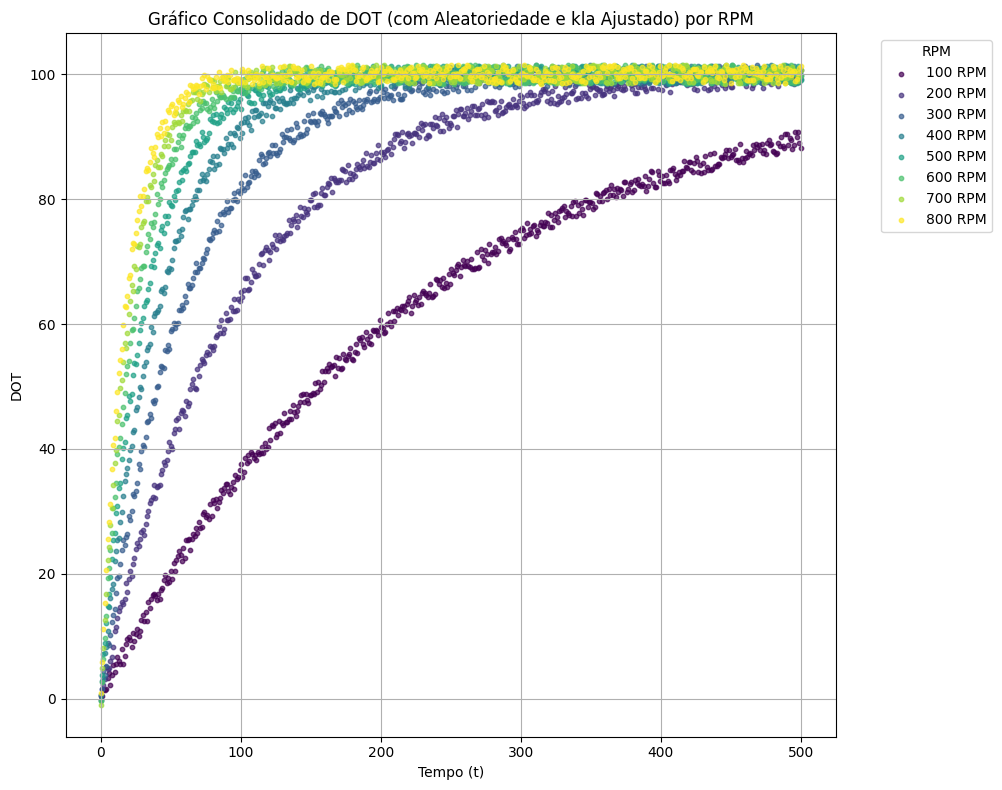

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd # Importa a biblioteca pandas

# --- Parâmetros Iniciais ---
DOT0 = 0.0   # Valor inicial de DOT
# kla será calculado dinamicamente para cada RPM
amplitude_flutuacao = 1.5 # Define a amplitude da flutuação aleatória

# Lista de RPMs para iterar
rpms_lista = [100, 200, 300, 400, 500, 600, 700, 800]

# --- Geração de Dados e Exportação ---
# Array de tempo de 0 a 150, com 150 pontos (constante para todas as iterações)
# Assumindo que a unidade de tempo 't' é consistente com a unidade de 'kla_calculado' (ex: segundos)
t = np.linspace(0.0, 500, 500) # Se 't' estiver em horas, a conversão de kla pode precisar de ajuste

# Lista para armazenar dados para o gráfico consolidado
dados_plot_consolidado = []

print("Iniciando processamento para múltiplos RPMs com kla ajustado...")

for rpm_valor in rpms_lista:
    print(f"\nProcessando para RPM = {rpm_valor}...")

    # Cálculo de kla específico para o RPM atual
    # Ajuste para converter a unidade (ex: de 1/hora para 1/segundo)
    kla_calculado = (0.0618 * (rpm_valor**1.21)) / 3600 # kla AJUSTADO
    print(f"kla calculado para {rpm_valor} RPM (ajustado): {kla_calculado:.6f}") # Aumentada precisão do print

    # Cálculo de DOT (sem ruído) para o kla atual
    # Equação: DOT = 100 - 100 * exp(-kla * t)
    DOT_original = 100 - 100 * np.exp(-kla_calculado * t)

    # Adição de ruído aleatório para simular dados reais
    ruido = np.random.uniform(-amplitude_flutuacao, amplitude_flutuacao, size=DOT_original.shape)
    DOT_com_ruido = DOT_original + ruido

    # Armazena os dados para o plot consolidado
    dados_plot_consolidado.append({
        'rpm': rpm_valor,
        'tempo': t,
        'dot_ruido': DOT_com_ruido,
        'dot_original': DOT_original
    })

    # --- Exportação para CSV (para o RPM atual) ---
    output_filename_csv = f"dados_dot_tempo_{rpm_valor}rpm.csv"
    try:
        # Cria um DataFrame do pandas com os dados
        df = pd.DataFrame({'Tempo': t, 'DOT': DOT_com_ruido})

        # Cria uma cópia para formatação
        df_export = df.copy()

        # Formata as colunas
        df_export['Tempo'] = df_export['Tempo'].apply(lambda x: f"{x:.1f}")
        df_export['DOT'] = df_export['DOT'].apply(lambda x: f"{x:.2f}")

        df_export.to_csv(output_filename_csv, index=False, sep=',')
        print(f"Dados exportados com sucesso para o arquivo: {output_filename_csv}")
    except ImportError:
        print("A biblioteca pandas não está instalada. Por favor, instale-a para exportar para CSV.")
        print("Você pode instalar usando: pip install pandas")
        break # Interrompe o loop principal se o pandas não estiver disponível
    except IOError:
        print(f"Erro ao tentar escrever no arquivo: {output_filename_csv}")
    except Exception as e:
        print(f"Ocorreu um erro inesperado durante a exportação para CSV ({output_filename_csv}): {e}")

    # --- Criação do Gráfico Individual (para o RPM atual) ---
    plt.figure(figsize=(10, 6))
    plt.scatter(t, DOT_com_ruido, label=f'DOT com Ruído ({rpm_valor} RPM)', color='purple', s=10)
    # Opcional: Plot da curva original (sem ruído) para comparação
    # plt.plot(t, DOT_original, label=f'DOT Original ({rpm_valor} RPM)', color='gray', linestyle='--')
    plt.title(f'Gráfico de DOT (Aleatoriedade) - {rpm_valor} RPM')
    plt.xlabel('Tempo (t)') # Considere ajustar a unidade se 't' estiver em horas e kla em 1/s
    plt.ylabel('DOT')
    plt.legend()
    plt.grid(True)
    plt.savefig(f"grafico_dot_tempo_individual_{rpm_valor}rpm.png")
    print(f"Gráfico individual salvo como: grafico_dot_tempo_individual_{rpm_valor}rpm.png")
    plt.close() # Fecha a figura para liberar memória

print("\nProcessamento de todos os RPMs concluído.")

# --- Criação do Gráfico Consolidado ---
print("\nGerando gráfico consolidado...")
plt.figure(figsize=(12, 8))
# Gera um esquema de cores para diferenciar as curvas de RPM
colors = plt.cm.viridis(np.linspace(0, 1, len(rpms_lista)))

for i, dados in enumerate(dados_plot_consolidado):
    plt.scatter(dados['tempo'], dados['dot_ruido'], label=f'{dados["rpm"]} RPM', color=colors[i], s=10, alpha=0.7)
    # Opcional: Plotar a curva original sem ruído para cada RPM no gráfico consolidado
    # plt.plot(dados['tempo'], dados['dot_original'], linestyle='--', color=colors[i], alpha=0.3)

plt.title('Gráfico Consolidado de DOT (com Aleatoriedade e kla Ajustado) por RPM')
plt.xlabel('Tempo (t)') # Considere ajustar a unidade
plt.ylabel('DOT')
plt.legend(title="RPM", bbox_to_anchor=(1.05, 1), loc='upper left') # Legenda fora do plot
plt.grid(True)
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Ajusta layout para caber a legenda
plt.savefig("grafico_dot_tempo_consolidado_rpm.png")
print("Gráfico consolidado salvo como: grafico_dot_tempo_consolidado_rpm.png")
# plt.show() # Descomente se quiser exibir o gráfico consolidado interativamente

print("\nFinalizado!")



Iniciando processamento para múltiplos RPMs com kla, tempo e número de pontos ajustados...

Processando para RPM = 100...
kla calculado para 100 RPM (ajustado): 0.004515
Tempo máximo da simulação ajustado para: 1290.76
Número de pontos no tempo ajustado para: 1292
Dados exportados com sucesso para o arquivo: dados_dot_tempo_100rpm.csv
Gráfico individual salvo como: grafico_dot_tempo_individual_100rpm.png

Processando para RPM = 200...
kla calculado para 200 RPM (ajustado): 0.010446
Tempo máximo da simulação ajustado para: 557.95
Número de pontos no tempo ajustado para: 559
Dados exportados com sucesso para o arquivo: dados_dot_tempo_200rpm.csv
Gráfico individual salvo como: grafico_dot_tempo_individual_200rpm.png

Processando para RPM = 300...
kla calculado para 300 RPM (ajustado): 0.017061
Tempo máximo da simulação ajustado para: 341.61
Número de pontos no tempo ajustado para: 343
Dados exportados com sucesso para o arquivo: dados_dot_tempo_300rpm.csv
Gráfico individual salvo como: gr

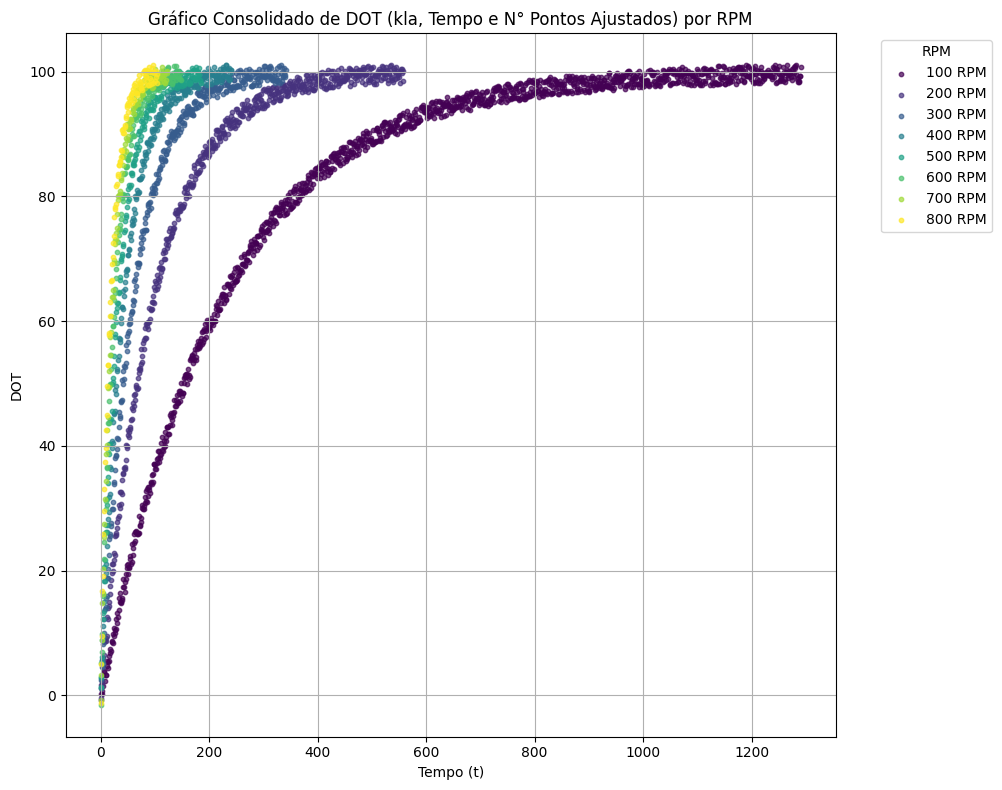

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd # Importa a biblioteca pandas

# --- Parâmetros Iniciais ---
DOT0 = 0.0   # Valor inicial de DOT
# kla será calculado dinamicamente para cada RPM
amplitude_flutuacao = 1.5 # Define a amplitude da flutuação aleatória
dt_desejado = 1.0 # Define o passo de tempo desejado para calcular o número de pontos
min_num_pontos_tempo = 50 # Número mínimo de pontos para o array de tempo

# Lista de RPMs para iterar
rpms_lista = [100, 200, 300, 400, 500, 600, 700, 800]

# Lista para armazenar dados para o gráfico consolidado
dados_plot_consolidado = []

print("Iniciando processamento para múltiplos RPMs com kla, tempo e número de pontos ajustados...")

for rpm_valor in rpms_lista:
    print(f"\nProcessando para RPM = {rpm_valor}...")

    # Cálculo de kla específico para o RPM atual
    kla_calculado = (0.0618 * (rpm_valor**1.21)) / 3600 # kla AJUSTADO
    print(f"kla calculado para {rpm_valor} RPM (ajustado): {kla_calculado:.6f}")

    # Cálculo do tempo final dinâmico para atingir ~99.5% de DOT
    if kla_calculado > 1e-9: # Evita divisão por zero ou kla muito pequeno
        t_final_necessario = np.log(200) / kla_calculado
        t_max_dinamico = t_final_necessario * 1.1 # Margem de 10%
        t_max_dinamico = max(t_max_dinamico, 10.0) # Tempo mínimo de simulação (ex: 10 unidades)
                                                 # para garantir que dt_desejado faça sentido.
                                                 # Se t_max for muito pequeno, num_pontos pode ficar baixo.
    else:
        t_max_dinamico = 150.0 # Fallback para o tempo original

    print(f"Tempo máximo da simulação ajustado para: {t_max_dinamico:.2f}")

    # Cálculo do número de pontos dinâmico para o array de tempo
    if t_max_dinamico > 0 and dt_desejado > 0:
        num_pontos_calculado = int(round(t_max_dinamico / dt_desejado)) + 1
    else: # Caso t_max_dinamico seja zero ou dt_desejado inválido
        num_pontos_calculado = 2 # Mínimo para linspace funcionar (start, stop)

    num_pontos_tempo_dinamico = max(min_num_pontos_tempo, num_pontos_calculado)
    # Garante que se t_max_dinamico for 0, num_pontos_tempo_dinamico seja min_num_pontos_tempo (ex: 50)
    # e linspace(0,0,50) retornará um array de 50 zeros.
    if t_max_dinamico == 0: # Caso especial para linspace(0,0,N)
        num_pontos_tempo_dinamico = max(2, min_num_pontos_tempo) # Precisa de pelo menos 2 para não ser só [0] se min_num_pontos_tempo for 1

    print(f"Número de pontos no tempo ajustado para: {num_pontos_tempo_dinamico}")

    # Array de tempo dinâmico (tanto o tempo final quanto o número de pontos são dinâmicos)
    t = np.linspace(0.0, t_max_dinamico, num_pontos_tempo_dinamico)

    # Cálculo de DOT (sem ruído) para o kla atual e tempo dinâmico
    DOT_original = 100 - 100 * np.exp(-kla_calculado * t)

    # Adição de ruído aleatório para simular dados reais
    ruido = np.random.uniform(-amplitude_flutuacao, amplitude_flutuacao, size=DOT_original.shape)
    DOT_com_ruido = DOT_original + ruido

    # Armazena os dados para o plot consolidado (incluindo o array 't' específico)
    dados_plot_consolidado.append({
        'rpm': rpm_valor,
        'tempo': t, # Armazena o array de tempo específico desta iteração
        'dot_ruido': DOT_com_ruido,
        'dot_original': DOT_original
    })

    # --- Exportação para CSV (para o RPM atual) ---
    output_filename_csv = f"dados_dot_tempo_{rpm_valor}rpm.csv"
    try:
        df = pd.DataFrame({'Tempo': t, 'DOT': DOT_com_ruido})
        df_export = df.copy()
        df_export['Tempo'] = df_export['Tempo'].apply(lambda x: f"{x:.1f}")
        df_export['DOT'] = df_export['DOT'].apply(lambda x: f"{x:.2f}")
        df_export.to_csv(output_filename_csv, index=False, sep=',')
        print(f"Dados exportados com sucesso para o arquivo: {output_filename_csv}")
    except ImportError:
        print("A biblioteca pandas não está instalada. Por favor, instale-a para exportar para CSV.")
        print("Você pode instalar usando: pip install pandas")
        break
    except IOError:
        print(f"Erro ao tentar escrever no arquivo: {output_filename_csv}")
    except Exception as e:
        print(f"Ocorreu um erro inesperado durante a exportação para CSV ({output_filename_csv}): {e}")

    # --- Criação do Gráfico Individual (para o RPM atual) ---
    plt.figure(figsize=(10, 6))
    plt.scatter(t, DOT_com_ruido, label=f'DOT com Ruído ({rpm_valor} RPM)', color='purple', s=10)
    # plt.plot(t, DOT_original, label=f'DOT Original ({rpm_valor} RPM)', color='gray', linestyle='--')
    plt.title(f'Gráfico de DOT (Aleatoriedade) - {rpm_valor} RPM')
    plt.xlabel('Tempo (t)')
    plt.ylabel('DOT')
    plt.legend()
    plt.grid(True)
    plt.savefig(f"grafico_dot_tempo_individual_{rpm_valor}rpm.png")
    print(f"Gráfico individual salvo como: grafico_dot_tempo_individual_{rpm_valor}rpm.png")
    plt.close()

print("\nProcessamento de todos os RPMs concluído.")

# --- Criação do Gráfico Consolidado ---
print("\nGerando gráfico consolidado...")
plt.figure(figsize=(12, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(rpms_lista)))

for i, dados in enumerate(dados_plot_consolidado):
    # Cada 'dados' agora tem seu próprio array 'tempo' com número de pontos variável
    plt.scatter(dados['tempo'], dados['dot_ruido'], label=f'{dados["rpm"]} RPM', color=colors[i], s=10, alpha=0.7)
    # plt.plot(dados['tempo'], dados['dot_original'], linestyle='--', color=colors[i], alpha=0.3)

plt.title('Gráfico Consolidado de DOT (kla, Tempo e N° Pontos Ajustados) por RPM')
plt.xlabel('Tempo (t)')
plt.ylabel('DOT')
plt.legend(title="RPM", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.savefig("grafico_dot_tempo_consolidado_rpm.png")
print("Gráfico consolidado salvo como: grafico_dot_tempo_consolidado_rpm.png")
# plt.show()

print("\nFinalizado!")
